In [1]:
# Importing Pandas for Dataframe Manipulation as well as Seaborn and Matplotlib for visualization purposes.
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Reading in our Advertising Data and printing the first five rows out to the console!
df = pd.read_csv("advertising.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [2]:
# Dropping all string-based attributes (models mainly operate on labeled numeric data).
df.drop(["Ad Topic Line", "City", "Country", "Timestamp"], axis=1, inplace=True)

# Visualizing our modified dataframe.
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


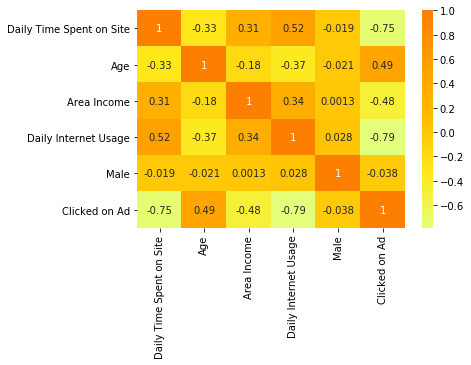

In [3]:
# Modeling the correlation between all variables with a Seaborn Heatmap.
corr = df.corr()
sns.heatmap(corr, cmap='Wistia', annot=True)

In [4]:
# Splitting up our overall dataset into X and Y subsets containing our independent and dependent variables, respectively.
x_data = df.drop("Clicked on Ad", axis=1)
y_data = df["Clicked on Ad"]

In [26]:
# Importing the "train_test_split" function from Scikit-Learn's 'model_selection' package.
from sklearn.model_selection import train_test_split

# Creating our X and Y train-test sets with a call to "train_test_split". (80-20 Split)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [27]:
# Importing the Logistic Regression Class.
from sklearn.linear_model import LogisticRegression

# Declaring and instantiating a new Logistic Regression Object.
classifier = LogisticRegression(solver="liblinear")

# Fitting our model to our X and Y train sets.
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Making predictions with our newly-trained model.
predictions = classifier.predict(x_test)
print(predictions)

[1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1
 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0
 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0
 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1]


In [29]:
from sklearn.metrics import *

# Printing the overall accuracy measure of our logistic regression model.
print("Model Accuracy: " + str(classifier.score(x_test, y_test)))
print()

# Printing a classification report on our model's performance.
print("Classification Report:")
print(classification_report(y_test, predictions))

Model Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       103
           1       0.95      0.86      0.90        97

    accuracy                           0.91       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



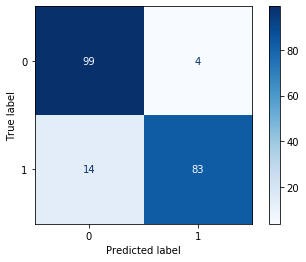

In [30]:
# Plotting a confusion matrix to view the distribution of correct and incorrect classifications.
plot_confusion_matrix(classifier, x_test, y_test, cmap='Blues')
plt.show()